# SUPPORT VECTOR CLASSIFIER

La implementación de sklearn la podemos encontrar [acá](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Vamos a trabajar con el siguiente dataset: 

https://www.kaggle.com/rakeshrau/social-network-ads

Las siguientes lineas lo descargan a su entorno de colab y lo importan como dataframe de pandas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aaPZi2Kc8K8ytNUYhOQl9s0xlj0BNtmF' -O ads.csv

In [3]:
df = pd.read_csv("ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Para nuestro problema, sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary`. Y como target a la columna `Purchased`

Separar en X e Y quedándonos con esas columnas:

In [5]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

Luego, debemos separar los datos de entrenamiento de los datos de testing, mediante la función `train_test_split`.

Separar los datos en train-test:

Utilizar un test_size de 0.25 y random state de 0

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

Además, vamos a proceder a estandarizar los datos.

Utilizar un standardScaler. Recuerden hacer fit solo sobre train.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Vamos a realizar el entrenamiento de nuestra SVM.

Importar SVC de sklearn y entrenarlo.

Utilizar un valor de C=1, un kernel='linear' y un random_state de 0.

In [8]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel="linear", random_state=0)

In [9]:
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

Una vez finalizado el entrenamiento, podemos realizar las predicciones sobre los datos de testing.

Guardar en una variable llamada Y_Pred las predicciones sobre el set de test.

In [10]:
Y_Pred = clf.predict(X_test)

Seguidamente, vamos a visualizar los resultados mediante:
 
* `Matriz de Confusión`
* `Reporte de Clasificación`
* `Gráfico de límites de Decisión`

Graficar la matriz de confusión:

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


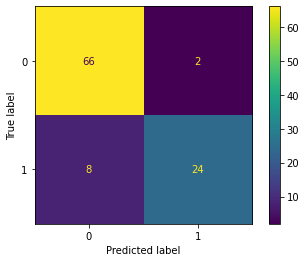

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

Imprimir el classification report utilizando la función de sklearn:

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



El siguiente código, no es necesario mirarlo en detalle. Vamos a simplemente ejecutarlo para visualizar.

Es importante que tengan las variables definidas con los nombres:

X_Train, Y_Train. Si no, deberán modificar el código para poner los nombres que ustedes tengan.

Set de train:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


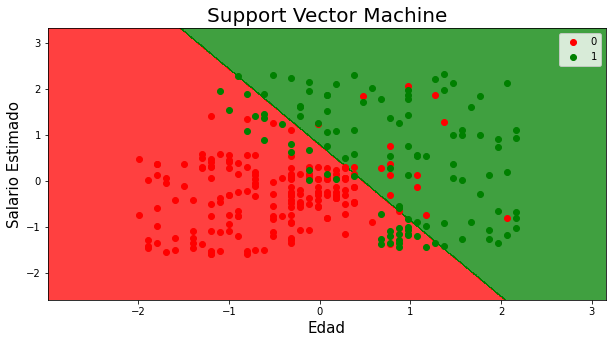

In [13]:
from matplotlib.colors import ListedColormap


def plot_decision_boundaries(X, Y):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Support Vector Machine', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_train, y_train)

Set de test:

(X_Test, Y_Test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


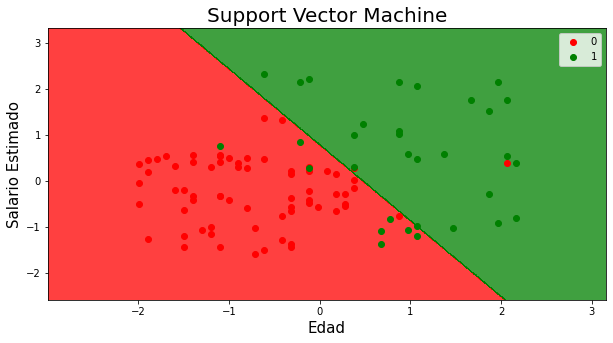

In [14]:
plot_decision_boundaries(X_test, y_test)

Modificar el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance.

Train:

In [15]:
clf = SVC(C= 1, kernel="rbf", random_state=0)
clf.fit(X_train, y_train)

SVC(C=1, random_state=0)

Test:

In [16]:
Y_Pred = clf.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


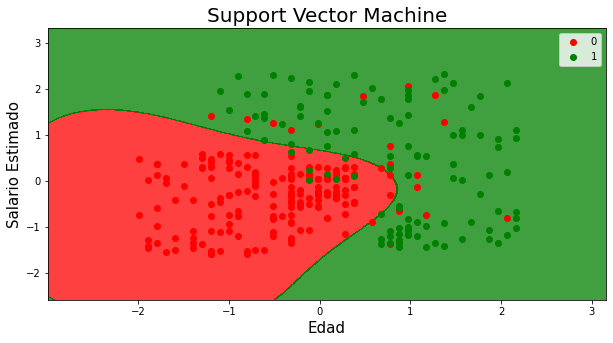

In [17]:
plot_decision_boundaries(X_train, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


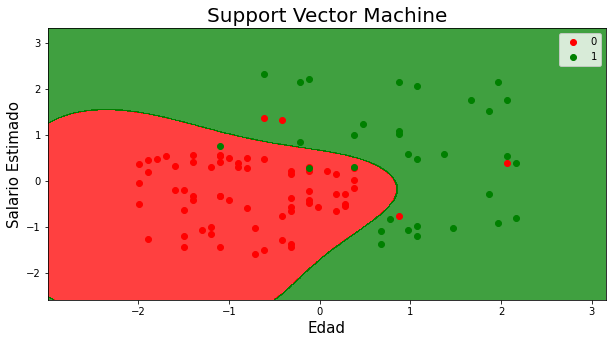

In [18]:
plot_decision_boundaries(X_test, y_test)

Modificar el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

Train

In [19]:
clf = SVC(C=50, random_state=0)

In [20]:
clf.fit(X_train, y_train)

SVC(C=50, random_state=0)

Test

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


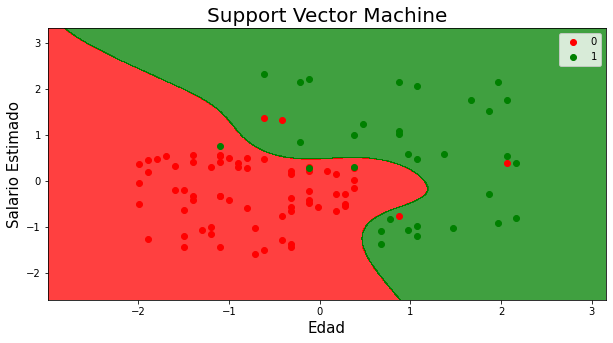

In [21]:
plot_decision_boundaries(X_test, y_test)

Utilizando GridSearchCV, buscar los mejores valores para c y kernel.

Probar: 

C: 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1

kernel: "linear", "poly", "rbf", "sigmoid"

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
params_dict = {
    "C": [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}

In [29]:
grid = GridSearchCV(SVC(), params_dict)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

¿Cuáles son los mejores hiperparámetros?

In [33]:
grid.best_estimator_

SVC(C=0.7)

¿Qué score obtiene el mejor clasificador?

In [34]:
grid.best_score_

0.9066666666666666